In [ ]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install scikit-learn --upgrade

# Distance Functions

In [1]:
from sklearn import datasets
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

We can compute the euclidean distance for the data 

$$d(x,y) = \sqrt{\sum_i(x_i-y_i)^2}$$

The plot on the left is the distance matrix, you can see the diagonal blocks that form the examples from each class, the plot on the right is the transformation of the distance matrix to a set of 2-D coordinates using Multidimensional Scaling

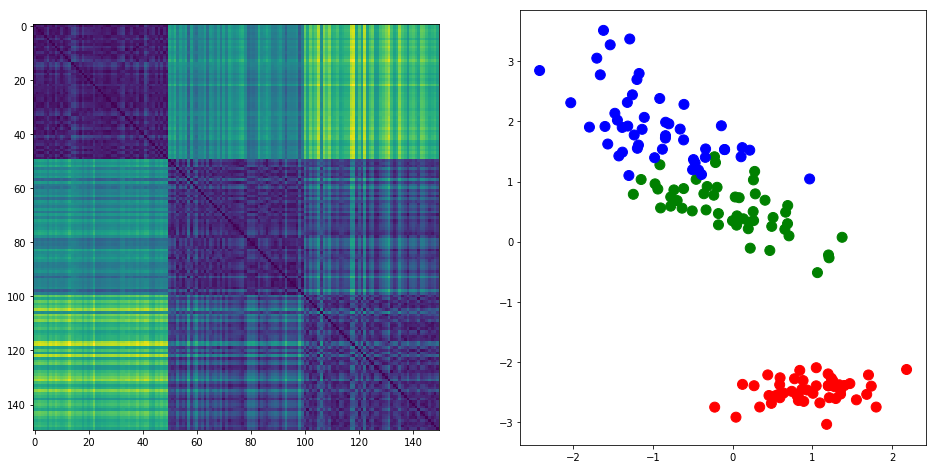

In [2]:
mdist = pairwise_distances(iris['data'], metric='euclidean')
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.imshow(mdist)
mds = MDS(n_components=2,dissimilarity='precomputed', random_state=0)
fdata = mds.fit_transform(mdist)
fig.add_subplot(122)
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)
plt.show()

Changing the distance we change the space where the examples are embedded. We can do the same using the cityblock/manhattan distance:

$$d(x,y) = \sum_i|x_i-y_i|$$

The distances are similar, so the plot of the MDS coordinates is also similar.

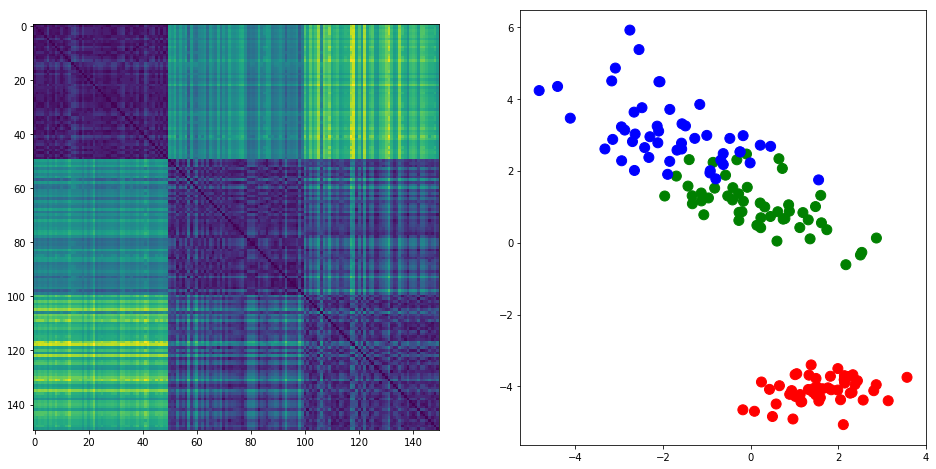

In [3]:
mdist = pairwise_distances(iris['data'], metric='cityblock')
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.imshow(mdist)
fdata = mds.fit_transform(mdist)
fig.add_subplot(122)
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

plt.show()

Mahalanobis distance is an euclidean distance that includes the covariance matrix, assuming that the attributes are not independent:

$$d(x,y) = \sqrt{(x-y)^T \Sigma^{-1} (x-y)}$$

This changes a lot the MDS transformation.

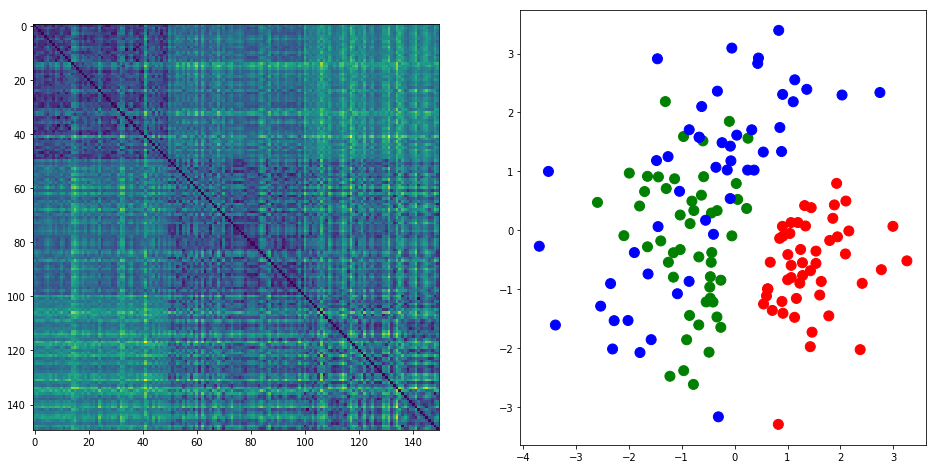

In [4]:
mdist = pairwise_distances(iris['data'], metric='mahalanobis')
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.imshow(mdist)
fdata = mds.fit_transform(mdist)
fig.add_subplot(122)
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)
plt.show()

Cosine distance measures the angle of the vectors associated with the examples:

$$d(x,y)=\frac{X  \cdot Y}{||X||\;||Y||}$$

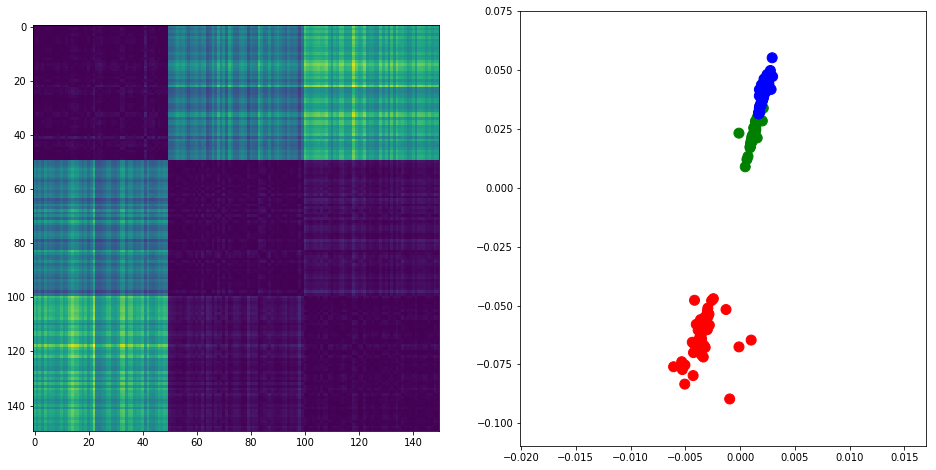

In [5]:
mdist = pairwise_distances(iris['data'], metric='cosine')
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.imshow(mdist)

fdata = mds.fit_transform(mdist)
fig.add_subplot(122)
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)
plt.show()

Correlation centers the data before computing the cosine distance

$$d(x,y)=\frac{(X - \overline{X}) \cdot (Y- \overline{Y})}{||(X- \overline{X})||\;||(Y- \overline{Y})||}$$

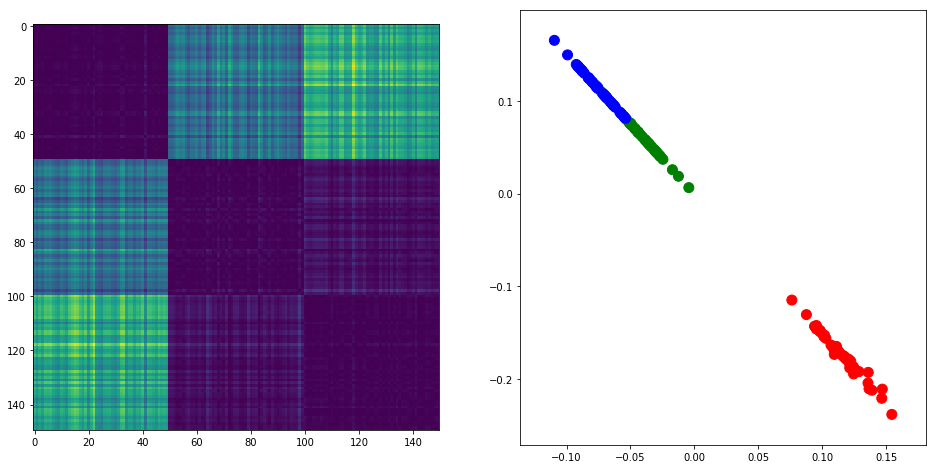

In [6]:
mdist = pairwise_distances(iris['data'], metric='correlation')
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.imshow(mdist)

fdata = mds.fit_transform(mdist)
fig.add_subplot(122)
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)
plt.show()